- 어제 사용한 데이터 사용
- 독립변수로 사용할 데이터 변수명 : fish_data
    - 데이터 형태 : 2차원 [[길이, 무게], [길이, 무게] ... ]

- 종속변수로 사용할 데이터 변수명 : fish_target
    - 도미 35개, 빙어 14개 데이터로 구성 되어 있음
    - 데이터 형태 : 1차원 [1, 1, 1, ... 0, 0 ]

In [1]:
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 
                            30.0, 30.7, 31.0, 31.0, 31.5, 32.0, 32.0, 32.0, 
                            33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                            35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 
                            39.5, 41.0, 41.0, 9.8, 10.5, 10.6, 11.0, 11.2, 
                            11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 
                            390.0, 450.0, 500.0, 475.0, 500.0, 500.0, 340.0, 
                            600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 
                            685.0, 620.0, 680.0, 700.0, 725.0, 720.0, 714.0, 
                            850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0,
                            6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]


In [ ]:
### 독립 변수, 종속 변수 생성

fish_data = [[l, w] for l , w in zip(fish_length, fish_weight)]
fish_target = [1] * 35 + [0] * 14

len(fish_data), len(fish_target)

(49, 49)

#### 데이터 분리 : 훈련, 테스트 (또는 훈련, 검증, 테스트)

- 데이터 분리
    - 훈련 데이터 : fit()
    - 검증 데이터 : score()
    - 테스트 데이터 : predict()
    - 훈련과 테스트 데이터로만 분리한 경우에는 테스트 데이터로 score() 및 predict() 모두 사용
<br><br>
- 데이터를 분리하는 이유
    - 훈련이 잘 되었는지에 대한 모델의 성능 검증을 위함
    - 검증에 타당성을 입증하기 위함
<br><br>
- 분리기준
    - 2개로 분리 -> 훈련 : 테스트
    - 3개로 분리 -> 훈련 : 검증 : 테스트
<br><br>
- 분리 비율
    - 2개로 분리
        - 훈련(7) : 테스트(3) : 주로 사용 됨
        - 훈련(7.5) : 테스트 (2.5)
        - 훈련(6) : 테스트(4)
    - 3개로 분리
        - 훈련(6) : 검증(2) : 테스트(2) : 주로 사용 됨
        - 훈련(7) : 검증(1.5) : 테스트(1.5)
        - 훈련(7) : 검증(2) : 테스트(1)
<br><br>
- 주로 사용되는 변수 이름
    - 훈련 데이터(train)
        - 훈련 독립변수명 : train_input, train_X, train_data
        - 훈련 종속변수명 : train_target, train_y
    - 검증 데이터(val)
        - 훈련 독립변수명 : val_input, val_X, val_data
        - 훈련 종속변수명 : val_target, val_y
    - 테스트 데이터(test)
        - 훈련 독립변수명 : test_input, test_X, test_data
        - 훈련 종속변수명 : test_target, test_y

#### 훈련 : 테스트 데이터로 분리하기

In [3]:
### 훈련 35개, 테스트 14개 데이터로 분리하기
# - 독립 및 종족변수 앞쪽 35개는 훈련으로, 뒤쪽 14개는 테스트로
# 훈련 변수명 : train_input, train_target
# 테스트 변수명 : test_input, test_target

# fish_data / fish_target

# 훈련 데이터의 독립변수
train_input = fish_data[ : 35]
# 훈련 데이터의 종속변수
train_target = fish_target[ : 35]

# 테스트 데이터의 독립변수
test_input = fish_data[35 : ]
# 테스트 데이터의 종속변수
test_target = fish_target[35 : ]

len(train_input) + len(test_input), len(train_target) + len(test_target)

(49, 49)

#### 훈련 시키기

In [4]:
### 머신러닝 라이브러리
from sklearn.neighbors import KNeighborsClassifier

### 시각화 라이브러리
import matplotlib.pyplot as plt

# - 한글처리
plt.rc("font", family="Malgun Gothic")

# - 마이너스 기호 깨짐 처리
plt.rcParams["axes.unicode_minus"] = False

In [5]:
### KNN 훈련 모델 생성하기
# - 변수명 : kn
# - 이웃의 갯수 : 기본값 5(생략가능)
kn = KNeighborsClassifier()

kn

KNeighborsClassifier()

In [6]:
### 훈련 시키기
kn.fit(train_input, train_target)

KNeighborsClassifier()

In [7]:
### 훈련 데이터로 정확도 확인
# - score() 함수가 내부적으로 처리하는 순서
# - predict(train_input) 처리 후 예측 결과 추출 -> [1, 1, 1, ...]
# -> 정답 train_target과 예측결과 비교하여 정답률 제출
train_score = kn.score(train_input, train_target)
train_score

1.0

In [8]:
### 테스트 데이터로 정확도 확인
# - 훈련을 잘 했는지 확인하기 위해 검증
test_score = kn.score(test_input, test_target)
test_score

0.0

In [9]:
### 테스트 데이터로 예측하는 과정
# - print 된 결과값을 비교하여 도출
test_predict = kn.predict(test_input)
print(test_predict)
print(test_target)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


##### 해석
- 테스트 정확도가 낮은 이유
    - 훈련 데이터에는 도미 데이터로 집중되어 있고 테스트 데이터에는 빙어 데이터에 집중 되어 있음
    - 이러한 현상을 편향이라고 함
- 훈련 데이터와 테스트 데이터가 특정 값에 편향 되어 있기에 나타난 현상
<br>

- 편향 해소 방법
    - 데이터의 특정 값들이 골고루 잘 섞이게 하면 됨
    - 데이터 전처리 및 가공 단계에서 처리
    - 섞는다는 의미 "split" 이라고 함

#### 편향 해소를 위한 데이터 랜덤하게 섞기

In [10]:
# 넘파이 라이브러리 정의
import numpy as np

In [11]:
### 원본 데이터를 이용해서 섞는 작업을 진행
# - 원본 데이터는 파이썬 기반의 List 타입
len(fish_data), len(fish_target)

(49, 49)

In [12]:
### 파이썬의 List 타입인 원본 데이터를 numpy의 배열(array) 타입(리스트와 동일하나 값의 형태가 다름)으로 변경
# - numpy를 통해 랜덤하게 섞기 위해서 numpy는 리스트가 아닌 배열을 사용함
input_arr = np.array(fish_data)
target_arr = np.array(fish_target)

### 데이터 갯수 확인
print(len(input_arr), len(target_arr))

### 데이터 차원 확인 (.shape : 넘파이 array 타입만 가능)
# - 결과값 :  (49, 2) = (49행 2열),  (49,) = (49행 1열)
print(input_arr.shape, target_arr.shape)

49 49
(49, 2) (49,)


In [13]:
#### 랜덤 규칙 정하기
# - 랜덤 라이브러리 : random
# - 랜덤 규칙 함수 : seed()
# - 숫자의 의미 : numpy 내부적으로 번호에 따라서 랜덤한 연산규칙이 있음
#                      : 숫자에 의미를 두지 않음 (보통 국내외에서 42를 많이 사용)
# - 랜덤 라이브러리를 사용하는 경우에는 규칙을 정해 놓으면 좋음
#   -> 여러명 또는 여러번에 걸쳐서 모델 성능을 검증할 경우
#       랜덤 규칙이 없는 경우 결과값이 실행 시마다 다를 수 있기 때문에 통일된 결과값을 위해 가급적 규칙 적용 
#       규칙을 적용하더라도 일부 값이 다르게 나오는 경우도 있음, 딥러닝에서는 규칙 적용 잘 안됨
np.random.seed(42)

In [14]:
### 랜덤한 인덱스 값 생성하기
# - input 및 target 데이터가 서로 매핑(통일) 되도록 섞기 위함

# - 0 ~ 48까지 인덱스 값 생성하기

index = np.arange(49)

index

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48])

In [15]:
### 0 ~ 48의 생성된 인덱스 값을 섞기
np.random.shuffle(index)

index

array([13, 45, 47, 44, 17, 27, 26, 25, 31, 19, 12,  4, 34,  8,  3,  6, 40,
       41, 46, 15,  9, 16, 24, 33, 30,  0, 43, 32,  5, 29, 11, 36,  1, 21,
        2, 37, 35, 23, 39, 10, 22, 18, 48, 20,  7, 42, 14, 28, 38])

In [16]:
# 훈련 데이터 생성 (35개)
# - 독립변수
train_input = input_arr[index[:35]]

# - 종속변수
train_target = target_arr[index[:35]]

### 데이터 차원 확인
train_input.shape, train_target.shape

((35, 2), (35,))

In [17]:
# 테스트 데이터 생성 (14개)
# - 독립변수
test_input = input_arr[index[35:]]

# - 종속변수
test_target = target_arr[index[35:]]

### 데이터 차원 확인
test_input.shape, test_target.shape

((14, 2), (14,))

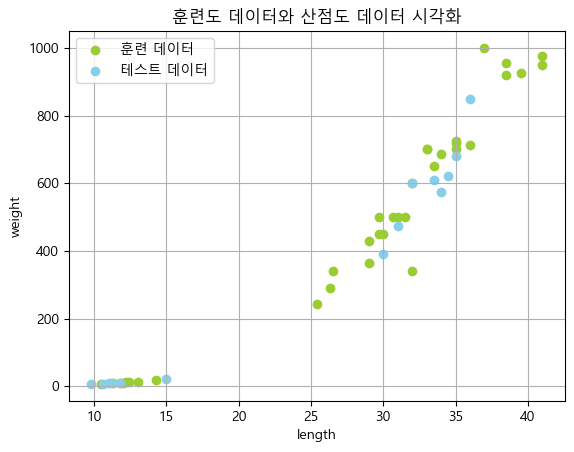

In [18]:
### 산점도로 시각화하여 확인
# - x축은 길이, y축은 무게
# - array() 타입도 리스트와 동일하게 사용하면 됨
# - 하나의 그래프에 훈련 데이터와 테스트 데이터 산점도 그리기
# - 색상 : 훈련데이터 연두, 테스트 데이터 하늘
plt.title("훈련도 데이터와 산점도 데이터 시각화")
plt.scatter(train_input[ : ,0], train_input[: , 1], color="yellowgreen", label ="훈련 데이터")
plt.scatter(test_input[ : ,0], test_input[ : ,1], color="skyblue", label ="테스트 데이터")
plt.xlabel("length")
plt.ylabel("weight")
plt.legend()
plt.grid()
plt.show()

In [ ]:
### 1. 훈련 모델 생성
# - 이웃의 갯수 : 기본값 5 사용
kn = KNeighborsClassifier()

kn

KNeighborsClassifier()

In [20]:
### 2. 훈련 시키기
kn.fit(train_input, train_target)

KNeighborsClassifier()

In [21]:
### 3. 훈련 정확도 및 테스트 정확도 확인
train_score = kn.score(train_input, train_target)
train_score

1.0

In [22]:
### 4. 테스트 데이터로 예측
test_score = kn.score(test_input, test_target)
test_score

1.0